In [2]:
from sentence_transformers import SentenceTransformer
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from bs4 import BeautifulSoup

# Prepare data

In [3]:
ratings = pd.read_excel("jester-data-1.xls", header=None)
ratings = ratings.iloc[:, 1:]
ratings = ratings.replace(99, np.nan)
ratings = ratings.mean()
ratings.shape

(100,)

In [5]:
joke_texts = []
for i in range(1, 101):
    file = "./jokes/init" + str(i) + ".html"
    with open(file, 'r') as f:
        file_read = f.read()
        parsed_html = BeautifulSoup(file_read)
        joke_text = parsed_html.body.find("font", attrs={"size": "+1"}).text.strip()
        joke_texts.append(joke_text)
print("Joke 1: ", joke_texts[0])
print("Total number of jokes: ", len(joke_texts))

Joke 1:  A man visits the doctor. The doctor says "I have bad news for you.You have
cancer and Alzheimer's disease". 
The man replies "Well,thank God I don't have cancer!"
Total number of jokes:  100


In [7]:
model = SentenceTransformer('bert-base-cased')
embeddings = model.encode(joke_texts)
embeddings.shape

No sentence-transformers model found with name C:\Users\Hien/.cache\torch\sentence_transformers\bert-base-cased. Creating a new one with MEAN pooling.
Some weights of the model checkpoint at C:\Users\Hien/.cache\torch\sentence_transformers\bert-base-cased were not used when initializing BertModel: ['cls.predictions.transform.dense.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification

(100, 768)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(embeddings, ratings, test_size=0.2, random_state=3)

In [9]:
print("X_train shape: ", X_train.shape)
print("y_train shape: ", y_train.shape)
print("X_test shape: ", X_test.shape)
print("y_test shape: ", y_test.shape)

X_train shape:  (80, 768)
y_train shape:  (80,)
X_test shape:  (20, 768)
y_test shape:  (20,)


# Test MLP model with default hyperparameters

In [10]:
MLPRegressor().get_params()

{'activation': 'relu',
 'alpha': 0.0001,
 'batch_size': 'auto',
 'beta_1': 0.9,
 'beta_2': 0.999,
 'early_stopping': False,
 'epsilon': 1e-08,
 'hidden_layer_sizes': (100,),
 'learning_rate': 'constant',
 'learning_rate_init': 0.001,
 'max_fun': 15000,
 'max_iter': 200,
 'momentum': 0.9,
 'n_iter_no_change': 10,
 'nesterovs_momentum': True,
 'power_t': 0.5,
 'random_state': None,
 'shuffle': True,
 'solver': 'adam',
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': False,
 'warm_start': False}

In [11]:
def train_model(rate_init=0.001, sizes=(100,), epochs=500):    
    loss_dict = dict()
    loss_dict["train"] = []
    loss_dict["test"] = []    
    model = MLPRegressor(solver='sgd', 
                        alpha=0.0,
                        learning_rate='constant',
                        learning_rate_init=rate_init,
                        hidden_layer_sizes=sizes,
                        random_state=0)
    for i in range(epochs):
        model.partial_fit(X_train, y_train)
        y_pred = model.predict(X_train)
        loss_dict["train"].append(mean_squared_error(y_train, y_pred))
        y_pred = model.predict(X_test)
        loss_dict["test"].append(mean_squared_error(y_test, y_pred))
    loss_dict["curves"] = model.loss_curve_
    return loss_dict

<function matplotlib.pyplot.show(close=None, block=None)>

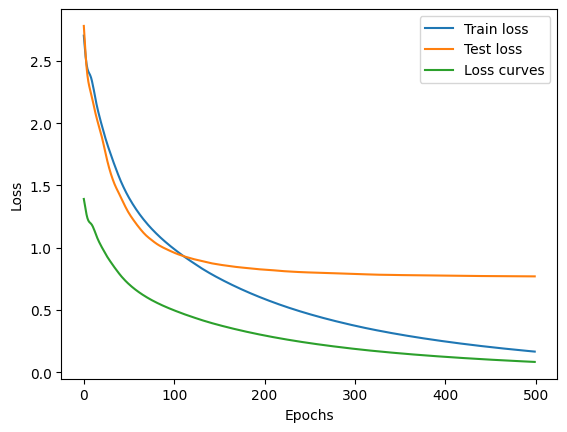

In [12]:
n = 500
loss_dict = train_model(epochs=n)
plt.plot(range(n), loss_dict["train"], label="Train loss")
plt.plot(range(n), loss_dict["test"], label="Test loss")
plt.plot(range(n), loss_dict["curves"], label="Loss curves")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show

# Investigate learning rate

<function matplotlib.pyplot.show(close=None, block=None)>

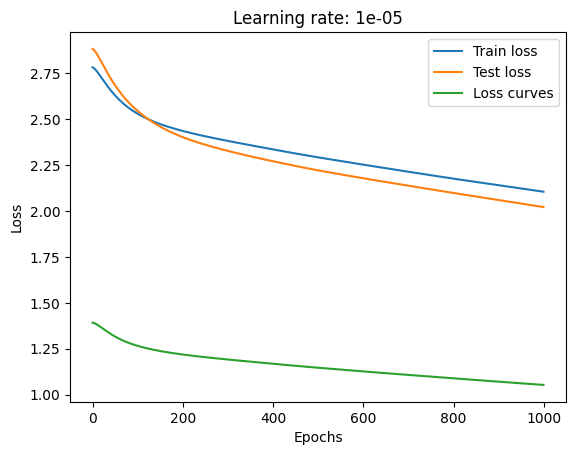

In [13]:
learning_rate = 0.00001
n = 1000
loss_dict = train_model(rate_init=learning_rate, epochs=n)
plt.plot(range(n), loss_dict["train"], label="Train loss")
plt.plot(range(n), loss_dict["test"], label="Test loss")
plt.plot(range(n), loss_dict["curves"], label="Loss curves")
plt.title(f"Learning rate: {learning_rate}")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

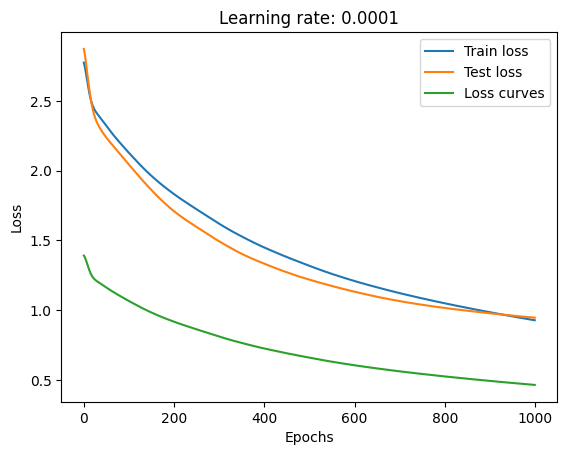

In [14]:
learning_rate = 0.0001
n = 1000
loss_dict = train_model(rate_init=learning_rate, epochs=n)
plt.plot(range(n), loss_dict["train"], label="Train loss")
plt.plot(range(n), loss_dict["test"], label="Test loss")
plt.plot(range(n), loss_dict["curves"], label="Loss curves")
plt.title(f"Learning rate: {learning_rate}")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

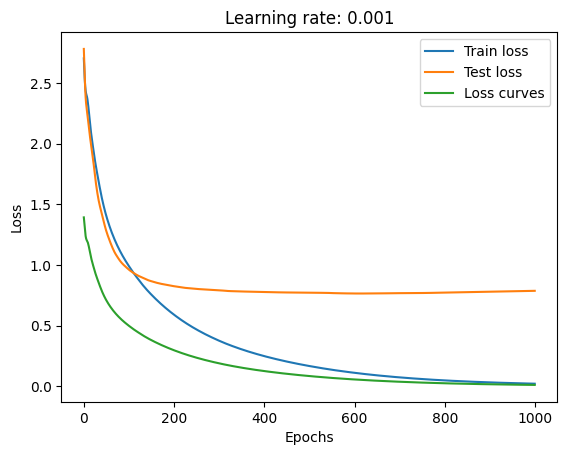

In [15]:
learning_rate = 0.001
n = 1000
loss_dict = train_model(rate_init=learning_rate, epochs=n)
plt.plot(range(n), loss_dict["train"], label="Train loss")
plt.plot(range(n), loss_dict["test"], label="Test loss")
plt.plot(range(n), loss_dict["curves"], label="Loss curves")
plt.title(f"Learning rate: {learning_rate}")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

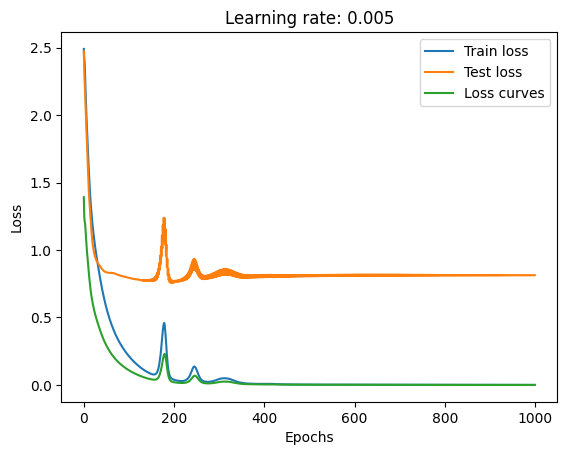

In [16]:
learning_rate = 0.005
n = 1000
loss_dict = train_model(rate_init=learning_rate, epochs=n)
plt.plot(range(n), loss_dict["train"], label="Train loss")
plt.plot(range(n), loss_dict["test"], label="Test loss")
plt.plot(range(n), loss_dict["curves"], label="Loss curves")
plt.title(f"Learning rate: {learning_rate}")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show

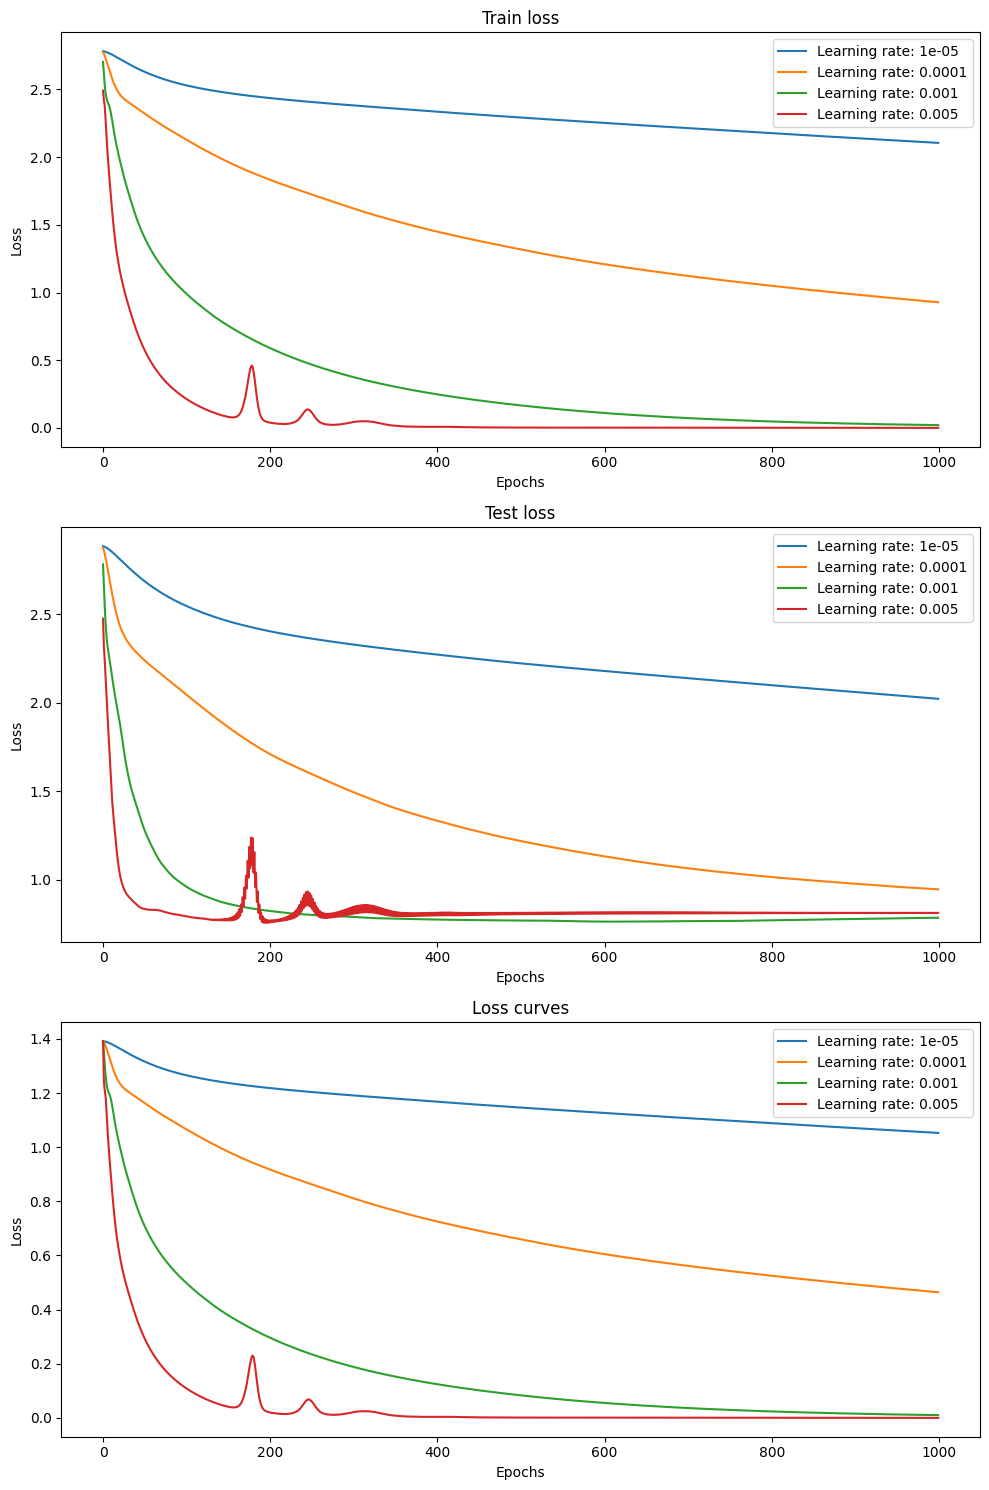

In [17]:
learning_rates = [0.00001, 0.0001, 0.001, 0.005]
n = 1000
figure, axis = plt.subplots(3, figsize=(10,15))
for rate in learning_rates:
    loss_dict = train_model(rate_init=rate, epochs=n)
    axis[0].plot(range(n), loss_dict["train"], label=f"Learning rate: {rate}")
    axis[1].plot(range(n), loss_dict["test"], label=f"Learning rate: {rate}")
    axis[2].plot(range(n), loss_dict["curves"], label=f"Learning rate: {rate}")
axis[0].set_title("Train loss")
axis[0].legend(loc="upper right")
axis[0].set(xlabel="Epochs", ylabel="Loss")
axis[1].set_title("Test loss")
axis[1].legend(loc="upper right")
axis[1].set(xlabel="Epochs", ylabel="Loss")
axis[2].set_title("Loss curves")
axis[2].legend(loc="upper right")
axis[2].set(xlabel="Epochs", ylabel="Loss")

plt.tight_layout()
plt.show()

# Investigate hidden layer sizes

<function matplotlib.pyplot.show(close=None, block=None)>

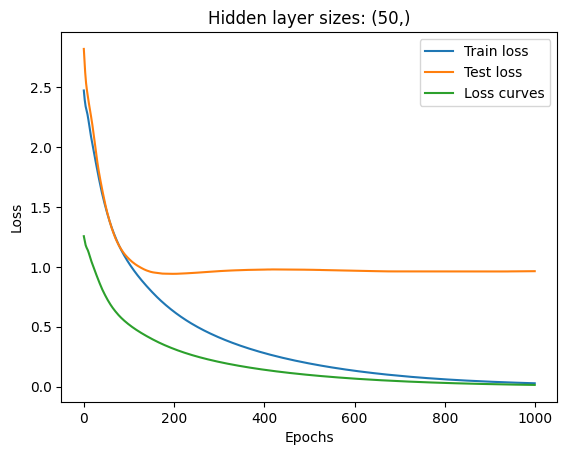

In [18]:
hl_sizes = (50,)
n = 1000
loss_dict = train_model(sizes=hl_sizes, epochs=n)
plt.plot(range(n), loss_dict["train"], label="Train loss")
plt.plot(range(n), loss_dict["test"], label="Test loss")
plt.plot(range(n), loss_dict["curves"], label="Loss curves")
plt.title(f"Hidden layer sizes: {hl_sizes}")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

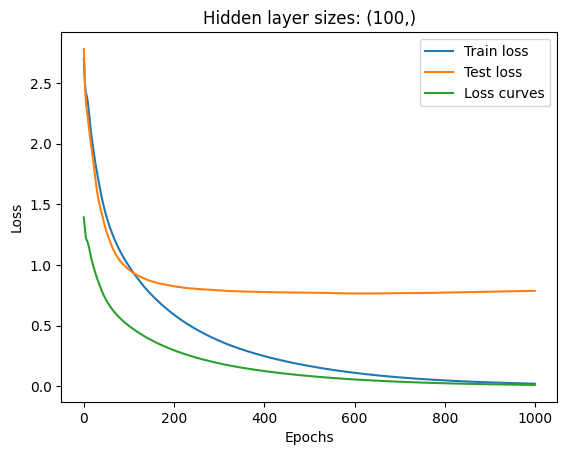

In [19]:
hl_sizes = (100,)
n = 1000
loss_dict = train_model(sizes=hl_sizes, epochs=n)
plt.plot(range(n), loss_dict["train"], label="Train loss")
plt.plot(range(n), loss_dict["test"], label="Test loss")
plt.plot(range(n), loss_dict["curves"], label="Loss curves")
plt.title(f"Hidden layer sizes: {hl_sizes}")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

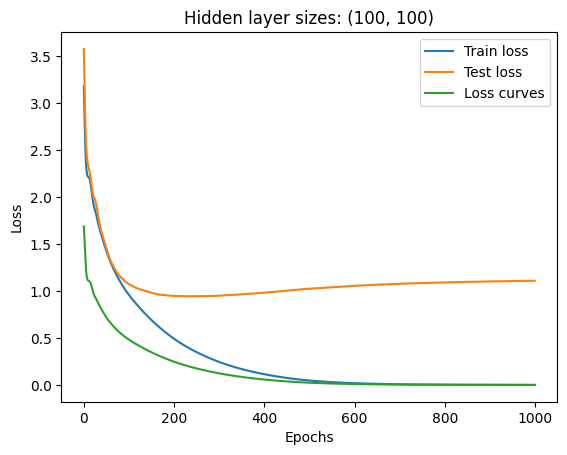

In [20]:
hl_sizes = (100, 100)
n = 1000
loss_dict = train_model(sizes=hl_sizes, epochs=n)
plt.plot(range(n), loss_dict["train"], label="Train loss")
plt.plot(range(n), loss_dict["test"], label="Test loss")
plt.plot(range(n), loss_dict["curves"], label="Loss curves")
plt.title(f"Hidden layer sizes: {hl_sizes}")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

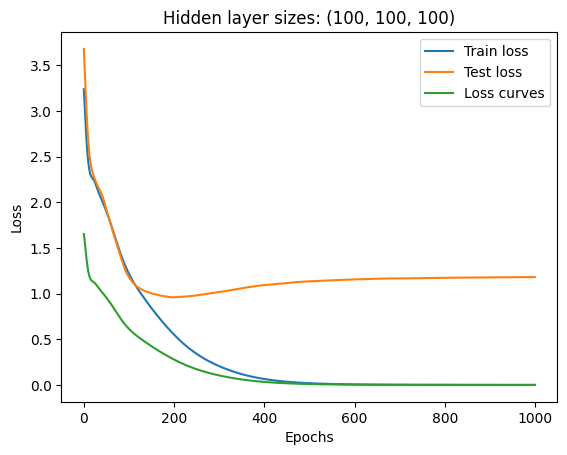

In [21]:
hl_sizes = (100, 100, 100)
n = 1000
loss_dict = train_model(sizes=hl_sizes, epochs=n)
plt.plot(range(n), loss_dict["train"], label="Train loss")
plt.plot(range(n), loss_dict["test"], label="Test loss")
plt.plot(range(n), loss_dict["curves"], label="Loss curves")
plt.title(f"Hidden layer sizes: {hl_sizes}")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show

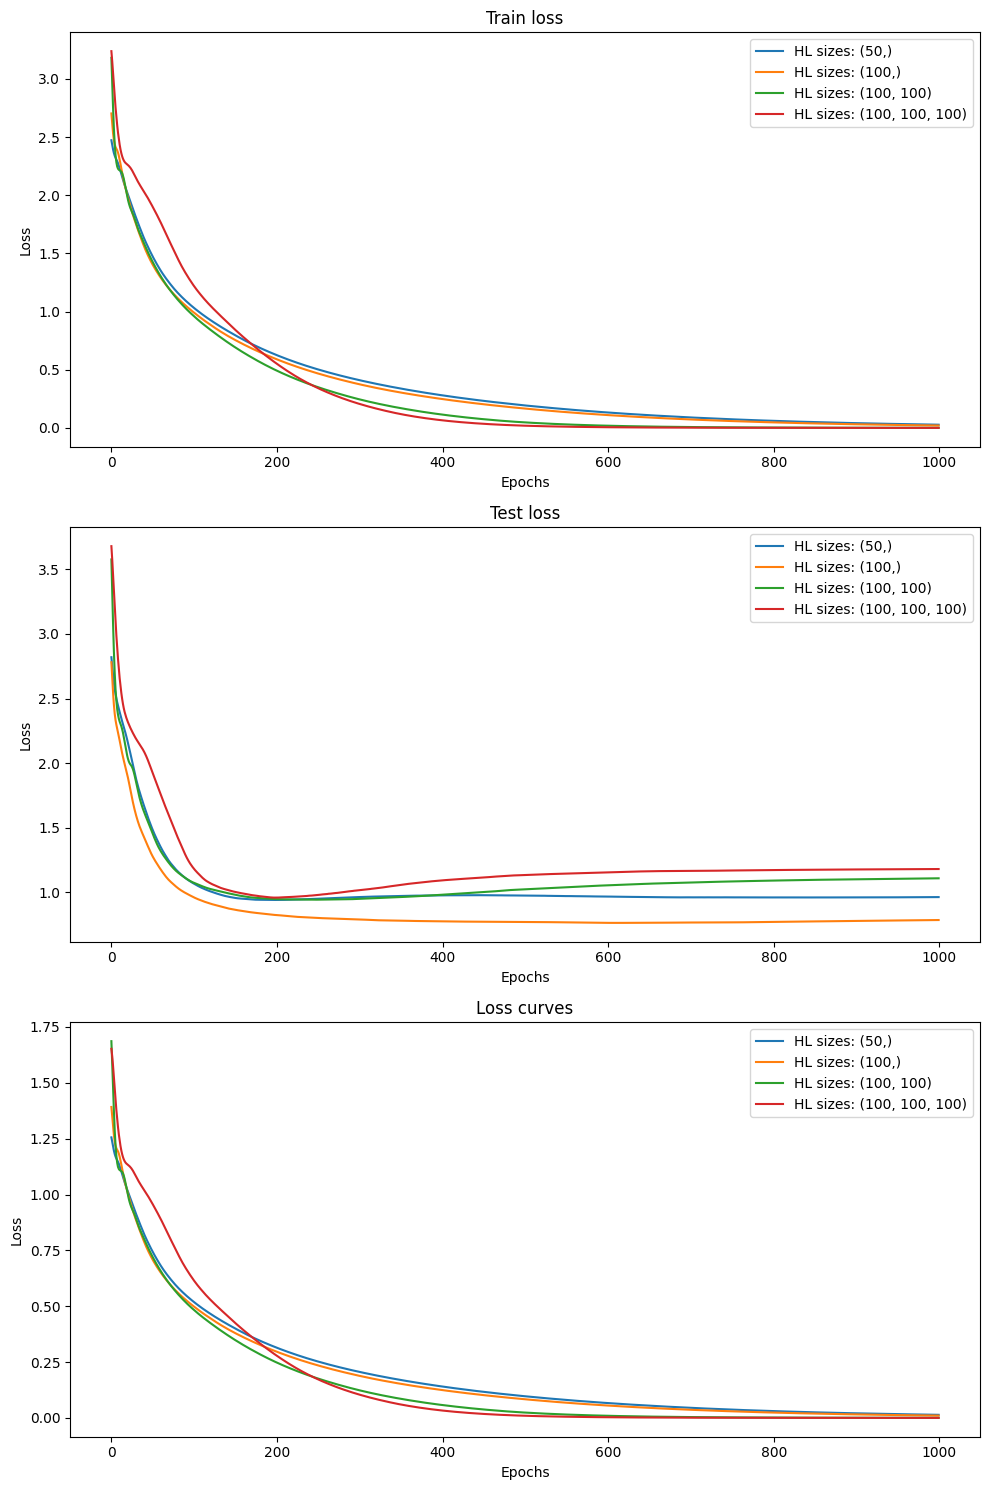

In [22]:
hl_sizes_list = [(50, ), (100, ), (100, 100), (100, 100, 100)]
n = 1000
figure, axis = plt.subplots(3, figsize=(10,15))
for hl_sizes in hl_sizes_list:
    loss_dict = train_model(sizes=hl_sizes, epochs=n)
    axis[0].plot(range(n), loss_dict["train"], label=f"HL sizes: {hl_sizes}")
    axis[1].plot(range(n), loss_dict["test"], label=f"HL sizes: {hl_sizes}")
    axis[2].plot(range(n), loss_dict["curves"], label=f"HL sizes: {hl_sizes}")
axis[0].set_title("Train loss")
axis[0].legend(loc="upper right")
axis[0].set(xlabel="Epochs", ylabel="Loss")
axis[1].set_title("Test loss")
axis[1].legend(loc="upper right")
axis[1].set(xlabel="Epochs", ylabel="Loss")
axis[2].set_title("Loss curves")
axis[2].legend(loc="upper right")
axis[2].set(xlabel="Epochs", ylabel="Loss")

plt.tight_layout()
plt.show()

# Choose the best model and test it in practice

In [23]:
learning_rate = 0.001
hl_sizes = (100,)
my_model = MLPRegressor(solver='sgd', 
                    alpha=0.0,
                    learning_rate='constant',
                    learning_rate_init=learning_rate,
                    hidden_layer_sizes=hl_sizes,
                    random_state=0)
my_model.fit(X_train, y_train)

C:\Users\Hien\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPRegressor(alpha=0.0, random_state=0, solver='sgd')

In [24]:
my_model.score(X_test, y_test)

0.6632878790896399

In [25]:
joke_text = ["Why don't scientists trust atoms? Because they make up everything!",
             "Why did the bicycle fall over? Because it was two-tired!",
             "Why don't skeletons fight each other? They don't have the guts!",
             "Why don't eggs tell jokes? Because they might crack up!"]
embeddings = model.encode(joke_text)
rating_preds = my_model.predict(embeddings)

In [26]:
rating_preds

array([-0.71462893, -0.97879255, -0.65574825, -1.0339189 ], dtype=float32)